# Implementation of Value Iteration on FrozenLake
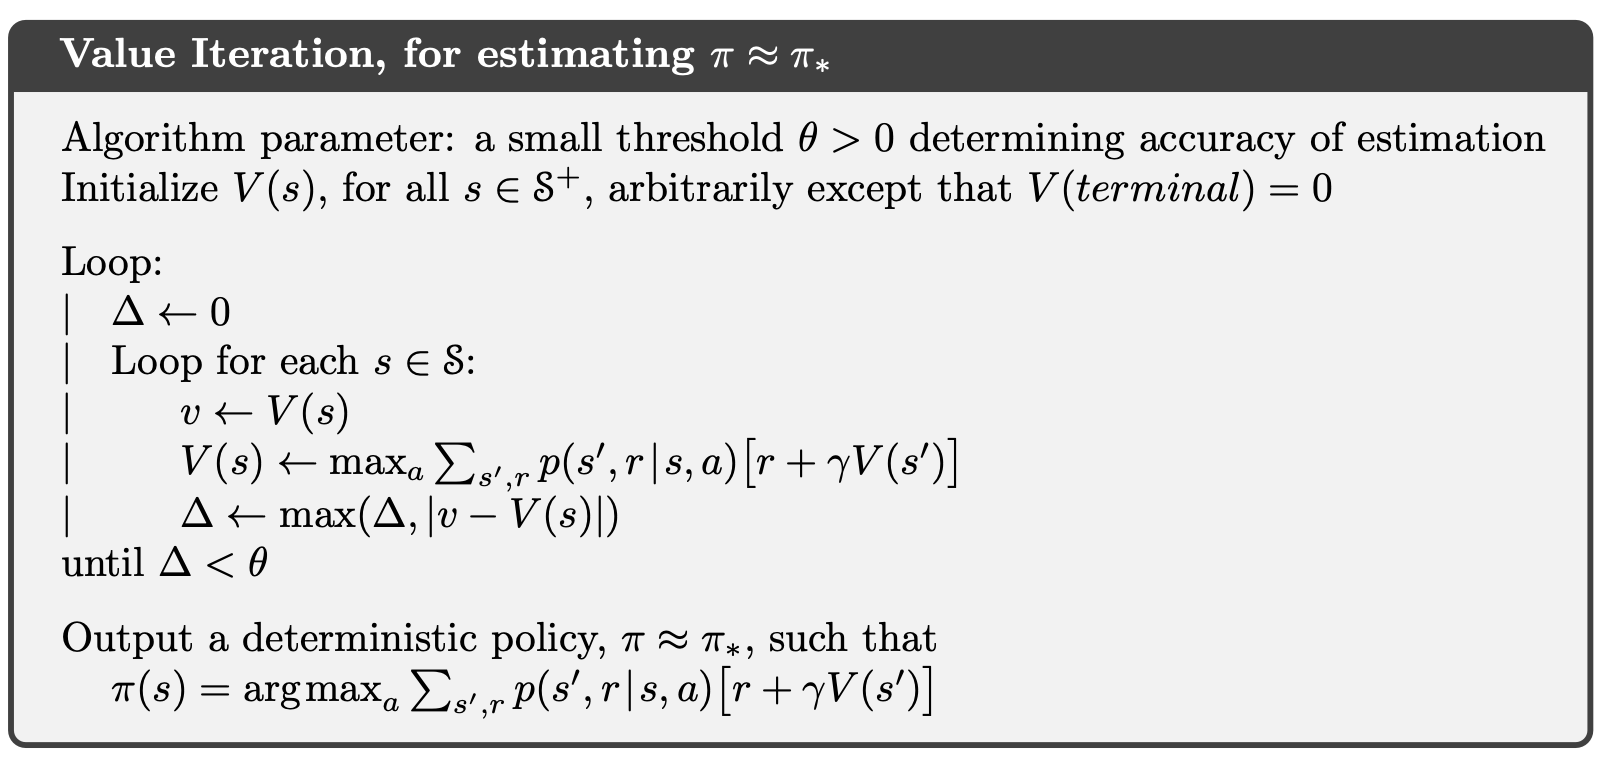

In [1]:
import gym 
import numpy as np

# Parameters
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="human")
nS = env.observation_space.n 
nA = env.action_space.n 
theta = 1e-9
gamma = 0.97

# Initialization
V = np.zeros([nS])
policy = np.zeros([nS], dtype=int)
env.reset()
env.render()

# Looping
while True:
    delta = 0.0
    for state in range(nS):
        currentValue = V[state]
        actionList = []
        for action in range(nA):
            currentAction = 0
            for p, nextState, reward, done in env.P[state][action]:
                currentAction += p * (reward + gamma * V[nextState])
            actionList.append(currentAction)
        V[state] = max(actionList)
        delta = max(delta, abs(currentValue - V[state]))
    if delta < theta:
        break

# Output a deterministic policy
for state in range(nS):
    actionList = []
    for action in range(nA):
        currentAction = 0
        for p, nextState, reward, done in env.P[state][action]:
            currentAction += p * (reward + gamma * V[nextState])
        actionList.append(currentAction)
    policy[state] = np.argmax(actionList)


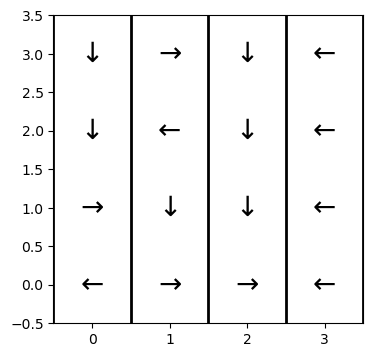

In [2]:
# Visualize the Policy
import matplotlib.pyplot as plt

def actionToArrow(action):
    if action == 0:
        return '←'
    elif action == 1:
        return '↓'
    elif action == 2:
        return '→'
    elif action == 3:
        return '↑'

nrow, ncol = 4, 4

fig, ax = plt.subplots(figsize=(ncol, nrow))
ax.set_xticks(np.arange(ncol+1)-0.5, minor=True)
ax.set_yticks(np.arange(nrow+1)-0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(which="minor", size=0)
ax.set_xlim(-0.5, ncol-0.5)
ax.set_ylim(-0.5, nrow-0.5)
for i in range(nrow):
    for j in range(ncol):
        action = policy[i*ncol + j]
        arrow = actionToArrow(action)
        ax.text(j, nrow-1-i, arrow, ha='center', va='center', fontsize=20)
plt.show()
env.close()

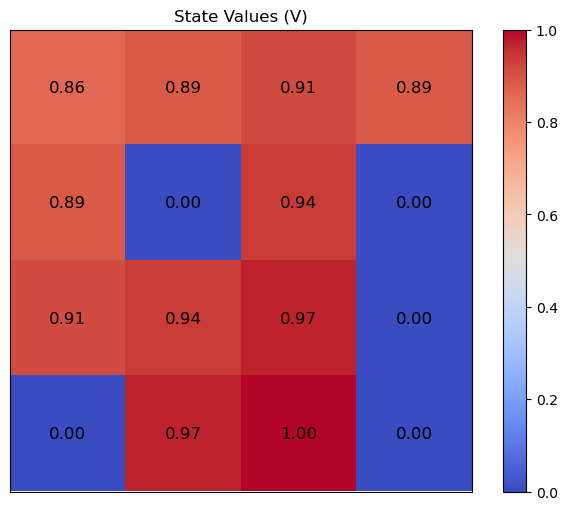

In [4]:
# Visualize the State Values
values_grid = V.reshape((nrow, ncol))
plt.figure(figsize=(8, 6))
plt.imshow(values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('State Values (V)')
for i in range(nrow):
    for j in range(ncol):
        plt.text(j, i, f'{values_grid[i, j]:.2f}', ha='center', va='center', color='black', fontsize=12)
plt.xticks([])
plt.yticks([])
plt.show()

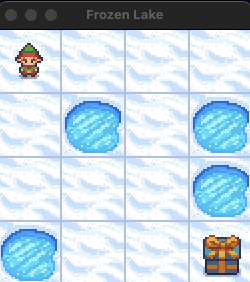

The image above is the map layout.